## Scaling and Normalization

In this notebook we are going to look into 2 rather mathematical concepts, Scaling and Normalization.
The idea is that we can scale the values and shape the distribution of feature in our dataset.

As an example we take a dataset containing samples from a low density polyethylene production process, containing several numerical features such as temperatures, Forces, Pressure,...

The idea is that by using Scaling and normalization, the 'range of motion' for these sensors is equal and we can compare the fluxtuations not only inbetween records, but also inbetween sensors.

In [1]:
import pandas as pd

In [2]:
ldpe_df = pd.read_csv('https://openmv.net/file/LDPE.csv').drop(columns=['Unnamed: 0'])
ldpe_df.head()

,Tin,Tmax1,Tout1,Tmax2,Tout2,Tcin1,Tcin2,z1,z2,Fi1,Fi2,Fs1,Fs2,Press,Conv,Mn,Mw,LCB,SCB
0,208.17,296.35,233.81,283.41,239.05,117.14,117.20,0.029,0.581,0.4507,0.4518,666.42,248.95,3021,0.1322,27379,160326,0.781,26.11
1,207.26,298.26,230.88,287.55,242.55,116.39,117.23,0.028,0.574,0.4765,0.5091,658.61,246.36,3033,0.1365,27043,165044,0.819,26.29
2,205.30,296.57,235.38,284.35,245.19,117.33,118.42,0.031,0.578,0.4744,0.4505,666.51,244.65,3004,0.1335,27344,165621,0.801,26.13
3,209.29,294.11,225.61,283.31,242.04,116.15,117.94,0.030,0.581,0.4429,0.4516,667.31,242.28,2980,0.1300,27502,160497,0.778,25.92
4,206.76,295.13,230.26,283.74,244.92,116.75,118.49,0.030,0.579,0.4394,0.4414,670.83,244.31,2997,0.1316,27518,165713,0.786,26.02


We can see that our features clearly have different ranges, but lets try to visualise these ranges using a density plot

<AxesSubplot:ylabel='Density'>

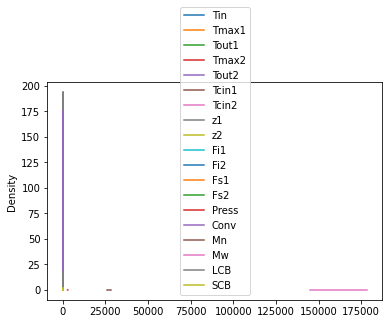

In [3]:
ldpe_df.plot(kind='density')

Ouch, this is clearly not working! Because the 'Mw' feature is in the range of 150k-175k our plot is so dilluted the rest are pinned to 0.
We can use the sklearn library to perform a min max scaling, this scaling will shift the distribution of each feature between 0 and 1, but that can also be adjusted.

In [4]:
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:ylabel='Density'>

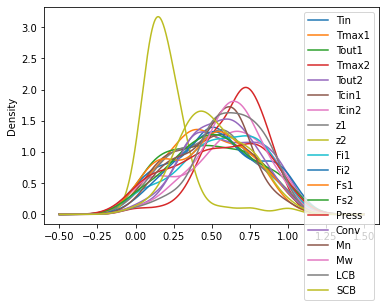

In [5]:
scaler = MinMaxScaler()
scaler.fit(ldpe_df)
pd.DataFrame(scaler.transform(ldpe_df), columns=ldpe_df.columns).plot(kind='density')

That makes a lot more sense, you can now see all of the distribution at once.
Also there seems to be one (yellow) feature that has some outliers perhaps something weird is going on there...

Taking it a step further we could also alter the distributions by using a standard scaler instead of a min max scaler, redistributing the values mathematically into a normal distribution.

In [6]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:ylabel='Density'>

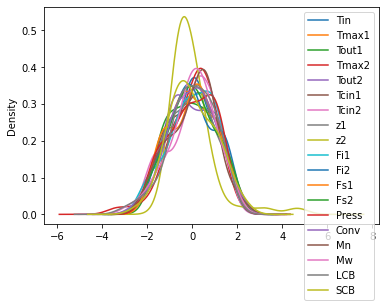

In [7]:
scaler = StandardScaler()
scaler.fit(ldpe_df)
pd.DataFrame(scaler.transform(ldpe_df), columns=ldpe_df.columns).plot(kind='density')

You can see it had some trouble fitting our special feature into the normal distribution but it did work out in the end.
With this we are ready to perform machine learning algorithms on this data, but first why not try and figure out where those outliers are I mentioned earlier?